# Load Packages

## Import

In [160]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import sys
import gc
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

## Setup

In [3]:
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')

## Version

In [12]:
print('pandas: {}'.format(pd.__version__))
print('numpy: {}'.format(np.__version__))
print('Python: {}'.format(sys.version))

pandas: 1.2.4
numpy: 1.20.1
Python: 3.8.8 (default, Apr 13 2021, 12:59:45) 
[Clang 10.0.0 ]


# Exploratory Data Analysis

## Data Collection

In [133]:
# Read original data
raw_train = pd.read_csv("/Users/hari/Downloads/santander-customer-transaction-prediction/train.csv")
raw_test = pd.read_csv("/Users/hari/Downloads/santander-customer-transaction-prediction/test.csv")
raw_sample = pd.read_csv("/Users/hari/Downloads/santander-customer-transaction-prediction/sample_submission.csv")
pd.options.display.max_columns = None

In [134]:
# Create copy for analysis
df_train = raw_train.copy()
df_test = raw_test.copy()
df_sample = raw_sample.copy()

In [38]:
df_train.shape, df_test.shape, df_sample.shape

((200000, 202), (200000, 201), (200000, 2))

In [39]:
print("The shape of the dataframe is: {:,} columns and {:,} rows".format(df_train.shape[1], df_train.shape[0]))

The shape of the dataframe is: 202 columns and 200,000 rows


In [40]:
df_train.head()

ID_code  target    var_0   var_1    var_2   var_3    var_4   var_5   var_6  \
0  train_0       0   8.9255 -6.7863  11.9081  5.0930  11.4607 -9.2834  5.1187   
1  train_1       0  11.5006 -4.1473  13.8588  5.3890  12.3622  7.0433  5.6208   
2  train_2       0   8.6093 -2.7457  12.0805  7.8928  10.5825 -9.0837  6.9427   
3  train_3       0  11.0604 -2.1518   8.9522  7.1957  12.5846 -1.8361  5.8428   
4  train_4       0   9.8369 -1.4834  12.8746  6.6375  12.2772  2.4486  5.9405   

     var_7   var_8   var_9  var_10   var_11   var_12   var_13  var_14  \
0  18.6266 -4.9200  5.7470  2.9252   3.1821  14.0137   0.5745  8.7989   
1  16.5338  3.1468  8.0851 -0.4032   8.0585  14.0239   8.4135  5.4345   
2  14.6155 -4.9193  5.9525 -0.3249 -11.2648  14.1929   7.3124  7.5244   
3  14.9250 -5.8609  8.2450  2.3061   2.8102  13.8463  11.9704  6.4569   
4  19.2514  6.2654  7.6784 -9.4458 -12.1419  13.8481   7.8895  7.7894   

    var_15   var_16   var_17   var_18   var_19   var_20   var_21   var_22  \
0  14.5691   5.7487  -7.2393   4.2840  30.7133  10.5350  16.2191   2.5791   
1  13.7003  13.8275 -15.5849   7.8000  28.5708   3.4287   2.7407   8.5524   
2  14.6472   7.6782  -1.7395   4.7011  20.4775  17.7559  18.1377   1.2145   
3  14.8372  10.7430  -0.4299  15.9426  13.7257  20.3010  12.5579   6.8202   
4  15.0553   8.4871  -3.0680   6.5263  11.3152  21.4246  18.9608  10.1102   

   var_23   var_24   var_25   var_26  var_27  var_28  var_29   var_30  \
0  2.4716  14.3831  13.4325  -5.1488 -0.4073  4.9306  5.9965  -0.3085   
1  3.3716   6.9779  13.8910 -11.7684 -2.5586  5.0464  0.5481  -9.2987   
2  3.5137   5.6777  13.2177  -7.9940 -2.9029  5.8463  6.1439 -11.1025   
3  2.7229  12.1354  13.7367   0.8135 -0.9059  5.9070  2.8407 -15.2398   
4  2.7142  14.2080  13.5433   3.1736 -3.3423  5.9015  7.9352  -3.1582   

    var_31  var_32   var_33   var_34   var_35  var_36  var_37   var_38  \
0  12.9041 -3.8766  16.8911  11.1920  10.5785  0.6764  7.8871   4.6667   
1   7.8755  1.2859  19.3710  11.3702   0.7399  2.7995  5.8434  10.8160   
2  12.4858 -2.2871  19.0422  11.0449   4.1087  4.6974  6.9346  10.8917   
3  10.4407 -2.5731   6.1796  10.6093  -5.9158  8.1723  2.8521   9.1738   
4   9.4668 -0.0083  19.3239  12.4057   0.6329  2.7922  5.8184  19.3038   

   var_39   var_40   var_41   var_42   var_43   var_44   var_45   var_46  \
0  3.8743  -5.2387   7.3746  11.5767  12.0446  11.6418  -7.0170   5.9226   
1  3.6783 -11.1147   1.8730   9.8775  11.7842   1.2444 -47.3797   7.3718   
2  0.9003 -13.5174   2.2439  11.5283  12.0406   4.1006  -7.9078  11.1405   
3  0.6665  -3.8294  -1.0370  11.7770  11.2834   8.0485 -24.6840  12.7404   
4  1.4450  -5.5963  14.0685  11.9171  11.5111   6.9087 -65.4863  13.8657   

    var_47   var_48   var_49   var_50   var_51  var_52  var_53  var_54  \
0 -14.2136  16.0283   5.3253  12.9194  29.0460 -0.6940  5.1736 -0.7474   
1   0.1948  34.4014  25.7037  11.8343  13.2256 -4.1083  6.6885 -8.0946   
2  -5.7864  20.7477   6.8874  12.9143  19.5856  0.7268  6.4059  9.3124   
3 -35.1659   0.7613   8.3838  12.6832   9.5503  1.7895  5.2091  8.0913   
4   0.0444  -0.1346  14.4268  13.3273  10.4857 -1.4367  5.7555 -8.5414   

    var_55   var_56  var_57  var_58   var_59   var_60   var_61  var_62  \
0  14.8322  11.2668  5.3822  2.0183  10.1166  16.1828   4.9590  2.0771   
1  18.5995  19.3219  7.0118  1.9210   8.8682   8.0109  -7.2417  1.7944   
2   6.2846  15.6372  5.8200  1.1000   9.1854  12.5963 -10.3734  0.8748   
3  12.3972  14.4698  6.5850  3.3164   9.4638  15.7820 -25.0222  3.4418   
4  14.1482  16.9840  6.1812  1.9548   9.2048   8.6591 -27.7439 -0.4952   

   var_63  var_64  var_65  var_66   var_67  var_68  var_69   var_70  var_71  \
0 -0.2154  8.6748  9.5319  5.8056  22.4321  5.0109 -4.7010  21.6374  0.5663   
1 -1.3147  8.1042  1.5365  5.4007   7.9344  5.0220  2.2302  40.5632  0.5134   
2  5.8042  3.7163 -1.1016  7.3667   9.8565  5.0228 -5.7828   2.3612  0.8520   
3 -4.3923  8.6464  6.3072  5.6221  23.6143  5.0220 -3.9989   4.0462

In [41]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB


In [42]:
# Check stastical summary
df_train.describe()

target          var_0          var_1          var_2  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        0.100490      10.679914      -1.627622      10.715192   
std         0.300653       3.040051       4.050044       2.640894   
min         0.000000       0.408400     -15.043400       2.117100   
25%         0.000000       8.453850      -4.740025       8.722475   
50%         0.000000      10.524750      -1.608050      10.580000   
75%         0.000000      12.758200       1.358625      12.516700   
max         1.000000      20.315000      10.376800      19.353000   

               var_3          var_4          var_5          var_6  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        6.796529      11.078333      -5.065317       5.408949   
std         2.043319       1.623150       7.863267       0.866607   
min        -0.040200       5.074800     -32.562600       2.347300   
25%         5.254075       9.883175     -11.200350       4.767700   
50%         6.825000      11.108250      -4.833150       5.385100   
75%         8.324100      12.261125       0.924800       6.003000   
max        13.188300      16.671400      17.251600       8.447700   

               var_7          var_8          var_9         var_10  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean       16.545850       0.284162       7.567236       0.394340   
std         3.418076       3.332634       1.235070       5.500793   
min         5.349700     -10.505500       3.970500     -20.731300   
25%        13.943800      -2.317800       6.618800      -3.594950   
50%        16.456800       0.393700       7.629600       0.487300   
75%        19.102900       2.937900       8.584425       4.382925   
max        27.691800      10.151300      11.150600      18.670200   

              var_11         var_12         var_13         var_14  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean       -3.245596      14.023978       8.530232       7.537606   
std         5.970253       0.190059       4.639536       2.247908   
min       -26.095000      13.434600      -6.011100       1.013300   
25%        -7.510600      13.894000       5.072800       5.781875   
50%        -3.286950      14.025500       8.604250       7.520300   
75%         0.852825      14.164200      12.274775       9.270425   
max        17.188700      14.654500      22.331500      14.937700   

              var_15         var_16         var_17         var_18  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean       14.573126       9.333264      -5.696731      15.244013   
std         0.411711       2.557421       6.712612       7.851370   
min        13.076900       0.635100     -33.380200     -10.664200   
25%        14.262800       7.452275     -10.476225       9.177950   
50%        14.574100       9.232050      -5.666350      15.196250   
75%        14.874500      11.055900      -0.810775      21.013325   
max        15.863300      17.950600      19.025900      41.748000   

              var_19         var_20         var_21         var_22  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean       12.438567      13.290894      17.257883       4.305430   
std         7.996694       5.876254       8.196564       2.847958   
min       -12.402500      -5.432200     -10.089000      -5.322500   
25%         6.276475       8.627800      11.551000       2.182400   
50%        12.453900      13.196800      17.234250       4.275150   
75%        18.433300      17.879400      23.089050       6.293200   
max        35.183000      31.285900      49.044300      14.594500   

              var_23         var_24         var_25         var_26  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        3.019540      10.584400      13.667496      -4.055133   
std         0.526893       3.777245       0.285535       5.922210   
min   

In [43]:
print("The shape of the dataframe is: {:,} columns and {:,} rows".format(df_test.shape[1], df_test.shape[0]))

The shape of the dataframe is: 201 columns and 200,000 rows


In [44]:
df_test.head()

ID_code    var_0    var_1    var_2   var_3    var_4   var_5   var_6  \
0  test_0  11.0656   7.7798  12.9536  9.4292  11.4327 -2.3805  5.8493   
1  test_1   8.5304   1.2543  11.3047  5.1858   9.1974 -4.0117  6.0196   
2  test_2   5.4827 -10.3581  10.1407  7.0479  10.2628  9.8052  4.8950   
3  test_3   8.5374  -1.3222  12.0220  6.5749   8.8458  3.1744  4.9397   
4  test_4  11.7058  -0.1327  14.1295  7.7506   9.1035 -8.5848  6.8595   

     var_7   var_8   var_9  var_10  var_11   var_12   var_13   var_14  \
0  18.2675  2.1337  8.8100 -2.0248 -4.3554  13.9696   0.3458   7.5408   
1  18.6316 -4.4131  5.9739 -1.3809 -0.3310  14.1129   2.5667   5.4988   
2  20.2537  1.5233  8.3442 -4.7057 -3.0422  13.6751   3.8183  10.8535   
3  20.5660  3.3755  7.4578  0.0095 -5.0659  14.0526  13.5010   8.7660   
4  10.6048  2.9890  7.1437  5.1025 -3.2827  14.1013   8.9672   4.7276   

    var_15   var_16   var_17   var_18   var_19   var_20   var_21  var_22  \
0  14.5001   7.7028 -19.0919  15.5806  16.1763   3.7088  18.8064  1.5899   
1  14.1853   7.0196   4.6564  29.1609   0.0910  12.1469   3.1389  5.2578   
2  14.2126   9.8837   2.6541  21.2181  20.8163  12.4666  12.3696  4.7473   
3  14.7352  10.0383 -15.3508   2.1273  21.4797  14.5372  12.5527  2.9707   
4  14.5811  11.8615   3.1480  18.0126  13.8006   1.6026  16.3059  6.7954   

   var_23   var_24   var_25   var_26  var_27  var_28  var_29   var_30  \
0  3.0654   6.4509  14.1192  -9.4902 -2.1917  5.7107  3.7864  -1.7981   
1  2.4228  16.2064  13.5023  -5.2341 -3.6648  5.7080  2.9965 -10.4720   
2  2.7936   5.2189  13.5670 -15.4246 -0.1655  7.2633  3.4310  -9.1508   
3  4.2398  13.7796  14.1408   1.0061 -1.3479  5.2570  6.5911   6.2161   
4  3.6015  13.6569  13.8807   8.6228 -2.2654  5.2255  7.0165 -15.6961   

    var_31  var_32   var_33   var_34  var_35  var_36  var_37   var_38  var_39  \
0   9.2645  2.0657  12.7753  11.3334  8.1462 -0.0610  3.5331   9.7804  8.7625   
1  11.4938 -0.9660  15.3445  10.6361  0.8966  6.7428  2.3421  12.8678 -1.5536   
2   9.7320  3.1062  22.3076  11.9593  9.9255  4.0702  4.9934   8.0667  0.8804   
3   9.5540  2.3628  10.2124  10.8047 -2.5588  6.0720  3.2613  16.5632  8.8336   
4  10.6239 -4.7674  17.5447  11.8668  3.0154  4.2546  6.7601   5.9613  0.3695   

    var_40   var_41   var_42   var_43   var_44   var_45   var_46   var_47  \
0 -15.6305  18.8766  11.2864  11.8362  13.3680 -31.9891  12.1776   8.7714   
1  10.0309   3.1337  10.5742  11.7664   2.1782 -41.1924  13.5322 -17.3834   
2 -19.0841   5.2272   9.5977  12.1801   8.3565  15.1170  10.0921 -20.8504   
3  -4.8327   0.9554  12.3754  11.4241   6.6917 -12.9761  13.7343   5.0150   
4 -14.4364   5.1392  11.6336  12.0338  18.9670  12.0144  16.2096  -2.1966   

    var_48   var_49   var_50   var_51  var_52  var_53  var_54   var_55  \
0  17.2011  16.8508  13.0534  14.4069 -4.8525  7.3213 -0.5259  16.6365   
1   6.3806  12.5589  11.6887  25.3930  1.5776  6.8481  8.7348  16.4239   
2   8.6758   8.1292  11.8932  10.6869 -0.6434  5.6510  9.3742  25.8831   
3  31.3923   5.8555  12.6082   1.4182 -4.1185  6.2536  1.4257  13.5426   
4   1.1174  13.4532  12.7925   4.3775 -0.1543  5.6794  0.8210  19.1358   

    var_56  var_57  var_58   var_59   var_60   var_61  var_62  var_63  var_64  \
0  19.3036  6.4129 -5.3948   9.3269  11.9314  -3.5750 -0.7706  0.8705  6.9282   
1  21.7056  6.9345  1.6678   9.5249   5.3383 -18.7083  1.3382 -1.7401  5.8398   
2  19.8701  5.4834 -4.0304   8.5160   8.9776  -5.6619  2.8117  2.5996  9.0986   
3  15.4090  6.8761  1.7476  10.0413  15.2857  -4.1378  0.7928  2.5301  8.1458   
4  12.6589  6.4394  4.3425   8.7003  12.0586 -10.4753 -0.0337  5.6603  6.2529   

   var_65  var_66   var_67  var_68  var_69   var_70  var_71  var_72   var_73  \
0  2.8914  5.9744  17.4851  5.0125 -1.4230  33.3401  0.8018 -4.7906  30.2708   
1  3.1051  4.4307  16.0005  5.0306 -7.3365  12.2806  0.6992 -0.7772  21.5123   
2  7.1167  4.9466  13.8268  5.0093  4.7782  19.2081  0.4340  0.8459  34.8598   
3  2.5738  5.9876  13.0758

In [45]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 201 entries, ID_code to var_199
dtypes: float64(200), object(1)
memory usage: 306.7+ MB


In [46]:
# Check stastical summary
df_test.describe()

var_0          var_1          var_2          var_3  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean       10.658737      -1.624244      10.707452       6.788214   
std         3.036716       4.040509       2.633888       2.052724   
min         0.188700     -15.043400       2.355200      -0.022400   
25%         8.442975      -4.700125       8.735600       5.230500   
50%        10.513800      -1.590500      10.560700       6.822350   
75%        12.739600       1.343400      12.495025       8.327600   
max        22.323400       9.385100      18.714100      13.142000   

               var_4          var_5          var_6          var_7  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean       11.076399      -5.050558       5.415164      16.529143   
std         1.616456       7.869293       0.864686       3.424482   
min         5.484400     -27.767000       2.216400       5.713700   
25%         9.891075     -11.201400       4.772600      13.933900   
50%        11.099750      -4.834100       5.391600      16.422700   
75%        12.253400       0.942575       6.005800      19.094550   
max        16.037100      17.253700       8.302500      28.292800   

               var_8          var_9         var_10         var_11  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        0.277135       7.569407       0.371335      -3.268551   
std         3.333375       1.231865       5.508661       5.961443   
min        -9.956000       4.243300     -22.672400     -25.811800   
25%        -2.303900       6.623800      -3.626000      -7.522000   
50%         0.372000       7.632000       0.491850      -3.314950   
75%         2.930025       8.584825       4.362400       0.832525   
max         9.665500      11.003600      20.214500      16.771300   

              var_12         var_13         var_14         var_15  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean       14.022662       8.540872       7.532703      14.573704   
std         0.190071       4.628712       2.255257       0.411592   
min        13.424500      -4.741300       0.670300      13.203400   
25%        13.891000       5.073375       5.769500      14.262400   
50%        14.024600       8.617400       7.496950      14.572700   
75%        14.162900      12.270900       9.271125      14.875600   
max        14.682000      21.605100      14.723100      15.798000   

              var_16        var_17         var_18         var_19  \
count  200000.000000  200000.00000  200000.000000  200000.000000   
mean        9.321669      -5.70445      15.265776      12.456675   
std         2.544860       6.74646       7.846983       7.989812   
min         0.314300     -28.90690     -11.324200     -12.699400   
25%         7.454400     -10.49790       9.237700       6.322300   
50%         9.228900      -5.69820      15.203200      12.484250   
75%        11.035500      -0.81160      21.014500      18.441950   
max        17.368700      19.15090      38.929000      35.432300   

              var_20         var_21         var_22         var_23  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean       13.298428      17.230598       4.299010       3.019707   
std         5.884245       8.199877       2.844023       0.527951   
min        -2.634600      -9.940600      -5.164000       1.390600   
25%         8.589600      11.511500       2.178300       2.633300   
50%        13.218650      17.211300       4.269000       3.008000   
75%        17.914200      23.031600       6.278200       3.405700   
max        32.075800      47.417900      14.042600       5.024600   

              var_24         var_25         var_26         var_27  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean       10.567479      13.666970      -3.983721      -1.129536   
std         3.771047       0.285454       5.945853       1.524765   
min        -0.73

Size of the properties of the dataset are large for a lower/mid-range laptop so let's make the dataset smaller without loosing information

## Reducing size of memory by 50%

Because we make a lot of calculations in this kernel, we'd better reduce the size of the data.

- 300 MB before Reducing
- 150 MB after Reducing

It uses the following approach:

- Iterate over every column
- Determine if the column is numeric
- Determine if the column can be represented by an integer
- Find the min and the max value
- Determine and apply the smallest datatype that can fit the range of values

In [31]:
#Based on this great kernel https://www.kaggle.com/arjanso/reducing-dataframe-memory-size-by-65

def reduce_mem_usage(df):
    start_mem_usg = df.memory_usage().sum() / 1024**2 
    print("Memory usage of properties dataframe is :",start_mem_usg," MB")
    NAlist = [] # Keeps track of columns that have missing values filled in. 
    for col in df.columns:
        if df[col].dtype != object:  # Exclude strings
            
            # Print current column type
            print("******************************")
            print("Column: ",col)
            print("dtype before: ",df[col].dtype)
            
            # make variables for Int, max and min
            IsInt = False
            mx = df[col].max()
            mn = df[col].min()
            
            # Integer does not support NA, therefore, NA needs to be filled
            if not np.isfinite(df[col]).all(): 
                NAlist.append(col)
                df[col].fillna(mn-1,inplace=True)  
                   
            # test if column can be converted to an integer
            asint = df[col].fillna(0).astype(np.int64)
            result = (df[col] - asint)
            result = result.sum()
            if result > -0.01 and result < 0.01:
                IsInt = True

            
            # Make Integer/unsigned Integer datatypes
            if IsInt:
                if mn >= 0:
                    if mx < 255:
                        df[col] = df[col].astype(np.uint8)
                    elif mx < 65535:
                        df[col] = df[col].astype(np.uint16)
                    elif mx < 4294967295:
                        df[col] = df[col].astype(np.uint32)
                    else:
                        df[col] = df[col].astype(np.uint64)
                else:
                    if mn > np.iinfo(np.int8).min and mx < np.iinfo(np.int8).max:
                        df[col] = df[col].astype(np.int8)
                    elif mn > np.iinfo(np.int16).min and mx < np.iinfo(np.int16).max:
                        df[col] = df[col].astype(np.int16)
                    elif mn > np.iinfo(np.int32).min and mx < np.iinfo(np.int32).max:
                        df[col] = df[col].astype(np.int32)
                    elif mn > np.iinfo(np.int64).min and mx < np.iinfo(np.int64).max:
                        df[col] = df[col].astype(np.int64)    
            
            # Make float datatypes 32 bit
            else:
                df[col] = df[col].astype(np.float32)
            
            # Print new column type
            print("dtype after: ",df[col].dtype)
            print("******************************")
    
    # Print final result
    print("___MEMORY USAGE AFTER COMPLETION:___")
    mem_usg = df.memory_usage().sum() / 1024**2 
    print("Memory usage is: ",mem_usg," MB")
    print("This is ",100*mem_usg/start_mem_usg,"% of the initial size")
    return df, NAlist

Reducing for train dataset

In [33]:
df_train, NAlist = reduce_mem_usage(df_train)
print("_________________")
print("")
print("Warning: the following columns have missing values filled with 'df['column_name'].min() -1': ")
print("_________________")
print("")
print(NAlist)

Memory usage of properties dataframe is : 154.30462646484375  MB
******************************
Column:  target
dtype before:  uint8
dtype after:  uint8
******************************
******************************
Column:  var_0
dtype before:  float32
dtype after:  float32
******************************
******************************
Column:  var_1
dtype before:  float32
dtype after:  float32
******************************
******************************
Column:  var_2
dtype before:  float32
dtype after:  float32
******************************
******************************
Column:  var_3
dtype before:  float32
dtype after:  float32
******************************
******************************
Column:  var_4
dtype before:  float32
dtype after:  float32
******************************
******************************
Column:  var_5
dtype before:  float32
dtype after:  float32
******************************
******************************
Column:  var_6
dtype before:  float32
dtype after:  f

dtype after:  float32
******************************
******************************
Column:  var_93
dtype before:  float32
dtype after:  float32
******************************
******************************
Column:  var_94
dtype before:  float32
dtype after:  float32
******************************
******************************
Column:  var_95
dtype before:  float32
dtype after:  float32
******************************
******************************
Column:  var_96
dtype before:  float32
dtype after:  float32
******************************
******************************
Column:  var_97
dtype before:  float32
dtype after:  float32
******************************
******************************
Column:  var_98
dtype before:  float32
dtype after:  float32
******************************
******************************
Column:  var_99
dtype before:  float32
dtype after:  float32
******************************
******************************
Column:  var_100
dtype before:  float32
dtype after:  f

dtype after:  float32
******************************
******************************
Column:  var_174
dtype before:  float32
dtype after:  float32
******************************
******************************
Column:  var_175
dtype before:  float32
dtype after:  float32
******************************
******************************
Column:  var_176
dtype before:  float32
dtype after:  float32
******************************
******************************
Column:  var_177
dtype before:  float32
dtype after:  float32
******************************
******************************
Column:  var_178
dtype before:  float32
dtype after:  float32
******************************
******************************
Column:  var_179
dtype before:  float32
dtype after:  float32
******************************
******************************
Column:  var_180
dtype before:  float32
dtype after:  float32
******************************
******************************
Column:  var_181
dtype before:  float32
dtype af

Reduced test datset

In [34]:
df_test, NAlist = reduce_mem_usage(df_test)
print("_________________")
print("")
print("Warning: the following columns have missing values filled with 'df['column_name'].min() -1': ")
print("_________________")
print("")
print(NAlist)

Memory usage of properties dataframe is : 306.7017822265625  MB
******************************
Column:  var_0
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  var_1
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  var_2
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  var_3
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  var_4
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  var_5
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  var_6
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  var_7
dtype before:  float64
dtype after: 

dtype after:  float32
******************************
******************************
Column:  var_67
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  var_68
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  var_69
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  var_70
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  var_71
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  var_72
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  var_73
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  var_74
dtype before:  float64
dtype after:  fl

dtype after:  float32
******************************
******************************
Column:  var_137
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  var_138
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  var_139
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  var_140
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  var_141
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  var_142
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  var_143
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  var_144
dtype before:  float64
dtype af

## Dataset Fields

In [47]:
df_train.columns

Index(['ID_code', 'target', 'var_0', 'var_1', 'var_2', 'var_3', 'var_4',
       'var_5', 'var_6', 'var_7',
       ...
       'var_190', 'var_191', 'var_192', 'var_193', 'var_194', 'var_195',
       'var_196', 'var_197', 'var_198', 'var_199'],
      dtype='object', length=202)

In [136]:
df_test.columns

Index(['ID_code', 'var_0', 'var_1', 'var_2', 'var_3', 'var_4', 'var_5',
       'var_6', 'var_7', 'var_8',
       ...
       'var_190', 'var_191', 'var_192', 'var_193', 'var_194', 'var_195',
       'var_196', 'var_197', 'var_198', 'var_199'],
      dtype='object', length=201)

In [48]:
print(len(df_train.columns))

202


In [ ]:
print(len(df_test.columns))

In [49]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB


In [51]:
df_train.dtypes

ID_code     object
target       int64
var_0      float64
var_1      float64
var_2      float64
            ...   
var_195    float64
var_196    float64
var_197    float64
var_198    float64
var_199    float64
Length: 202, dtype: object

We can observe that there are many uncharacterized numerical features with 'var_' as their prefix and 200 in number.  Plotting histograms can shed more light on their numerical appearance. 

## Numerical Description

In [52]:
df_train.describe()

target          var_0          var_1          var_2  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        0.100490      10.679914      -1.627622      10.715192   
std         0.300653       3.040051       4.050044       2.640894   
min         0.000000       0.408400     -15.043400       2.117100   
25%         0.000000       8.453850      -4.740025       8.722475   
50%         0.000000      10.524750      -1.608050      10.580000   
75%         0.000000      12.758200       1.358625      12.516700   
max         1.000000      20.315000      10.376800      19.353000   

               var_3          var_4          var_5          var_6  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        6.796529      11.078333      -5.065317       5.408949   
std         2.043319       1.623150       7.863267       0.866607   
min        -0.040200       5.074800     -32.562600       2.347300   
25%         5.254075       9.883175     -11.200350       4.767700   
50%         6.825000      11.108250      -4.833150       5.385100   
75%         8.324100      12.261125       0.924800       6.003000   
max        13.188300      16.671400      17.251600       8.447700   

               var_7          var_8          var_9         var_10  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean       16.545850       0.284162       7.567236       0.394340   
std         3.418076       3.332634       1.235070       5.500793   
min         5.349700     -10.505500       3.970500     -20.731300   
25%        13.943800      -2.317800       6.618800      -3.594950   
50%        16.456800       0.393700       7.629600       0.487300   
75%        19.102900       2.937900       8.584425       4.382925   
max        27.691800      10.151300      11.150600      18.670200   

              var_11         var_12         var_13         var_14  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean       -3.245596      14.023978       8.530232       7.537606   
std         5.970253       0.190059       4.639536       2.247908   
min       -26.095000      13.434600      -6.011100       1.013300   
25%        -7.510600      13.894000       5.072800       5.781875   
50%        -3.286950      14.025500       8.604250       7.520300   
75%         0.852825      14.164200      12.274775       9.270425   
max        17.188700      14.654500      22.331500      14.937700   

              var_15         var_16         var_17         var_18  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean       14.573126       9.333264      -5.696731      15.244013   
std         0.411711       2.557421       6.712612       7.851370   
min        13.076900       0.635100     -33.380200     -10.664200   
25%        14.262800       7.452275     -10.476225       9.177950   
50%        14.574100       9.232050      -5.666350      15.196250   
75%        14.874500      11.055900      -0.810775      21.013325   
max        15.863300      17.950600      19.025900      41.748000   

              var_19         var_20         var_21         var_22  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean       12.438567      13.290894      17.257883       4.305430   
std         7.996694       5.876254       8.196564       2.847958   
min       -12.402500      -5.432200     -10.089000      -5.322500   
25%         6.276475       8.627800      11.551000       2.182400   
50%        12.453900      13.196800      17.234250       4.275150   
75%        18.433300      17.879400      23.089050       6.293200   
max        35.183000      31.285900      49.044300      14.594500   

              var_23         var_24         var_25         var_26  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        3.019540      10.584400      13.667496      -4.055133   
std         0.526893       3.777245       0.285535       5.922210   
min   

In [53]:
df_test.describe()

var_0          var_1          var_2          var_3  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean       10.658737      -1.624244      10.707452       6.788214   
std         3.036716       4.040509       2.633888       2.052724   
min         0.188700     -15.043400       2.355200      -0.022400   
25%         8.442975      -4.700125       8.735600       5.230500   
50%        10.513800      -1.590500      10.560700       6.822350   
75%        12.739600       1.343400      12.495025       8.327600   
max        22.323400       9.385100      18.714100      13.142000   

               var_4          var_5          var_6          var_7  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean       11.076399      -5.050558       5.415164      16.529143   
std         1.616456       7.869293       0.864686       3.424482   
min         5.484400     -27.767000       2.216400       5.713700   
25%         9.891075     -11.201400       4.772600      13.933900   
50%        11.099750      -4.834100       5.391600      16.422700   
75%        12.253400       0.942575       6.005800      19.094550   
max        16.037100      17.253700       8.302500      28.292800   

               var_8          var_9         var_10         var_11  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        0.277135       7.569407       0.371335      -3.268551   
std         3.333375       1.231865       5.508661       5.961443   
min        -9.956000       4.243300     -22.672400     -25.811800   
25%        -2.303900       6.623800      -3.626000      -7.522000   
50%         0.372000       7.632000       0.491850      -3.314950   
75%         2.930025       8.584825       4.362400       0.832525   
max         9.665500      11.003600      20.214500      16.771300   

              var_12         var_13         var_14         var_15  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean       14.022662       8.540872       7.532703      14.573704   
std         0.190071       4.628712       2.255257       0.411592   
min        13.424500      -4.741300       0.670300      13.203400   
25%        13.891000       5.073375       5.769500      14.262400   
50%        14.024600       8.617400       7.496950      14.572700   
75%        14.162900      12.270900       9.271125      14.875600   
max        14.682000      21.605100      14.723100      15.798000   

              var_16        var_17         var_18         var_19  \
count  200000.000000  200000.00000  200000.000000  200000.000000   
mean        9.321669      -5.70445      15.265776      12.456675   
std         2.544860       6.74646       7.846983       7.989812   
min         0.314300     -28.90690     -11.324200     -12.699400   
25%         7.454400     -10.49790       9.237700       6.322300   
50%         9.228900      -5.69820      15.203200      12.484250   
75%        11.035500      -0.81160      21.014500      18.441950   
max        17.368700      19.15090      38.929000      35.432300   

              var_20         var_21         var_22         var_23  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean       13.298428      17.230598       4.299010       3.019707   
std         5.884245       8.199877       2.844023       0.527951   
min        -2.634600      -9.940600      -5.164000       1.390600   
25%         8.589600      11.511500       2.178300       2.633300   
50%        13.218650      17.211300       4.269000       3.008000   
75%        17.914200      23.031600       6.278200       3.405700   
max        32.075800      47.417900      14.042600       5.024600   

              var_24         var_25         var_26         var_27  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean       10.567479      13.666970      -3.983721      -1.129536   
std         3.771047       0.285454       5.945853       1.524765   
min        -0.73

- Standard Deviation in both train and test is quite significant
- Mean and other measures are close

## Missing Values

In [60]:
# Check null in train and test
null_count_train = sum(df_train.isnull().any())
print("There are {} NULL values in the train data".format(null_count_train),"\n")

null_count_test = sum(df_test.isnull().any())
print("There are {} NULL values in the test data".format(null_count_test))

There are 0 NULL values in the train data 

There are 0 NULL values in the test data


In [56]:
#checking for missing values and data types in train data
value = []
for col in df_train.columns:
    dtype = str(df_train[col].dtype)
    value.append(dtype)
dt = pd.DataFrame(data=df_train.isnull().sum(),columns=['Missing'])
dt['dtypes']=value
np.transpose(dt)

ID_code target    var_0    var_1    var_2    var_3    var_4    var_5  \
Missing       0      0        0        0        0        0        0        0   
dtypes   object  int64  float64  float64  float64  float64  float64  float64   

           var_6    var_7    var_8    var_9   var_10   var_11   var_12  \
Missing        0        0        0        0        0        0        0   
dtypes   float64  float64  float64  float64  float64  float64  float64   

          var_13   var_14   var_15   var_16   var_17   var_18   var_19  \
Missing        0        0        0        0        0        0        0   
dtypes   float64  float64  float64  float64  float64  float64  float64   

          var_20   var_21   var_22   var_23   var_24   var_25   var_26  \
Missing        0        0        0        0        0        0        0   
dtypes   float64  float64  float64  float64  float64  float64  float64   

          var_27   var_28   var_29   var_30   var_31   var_32   var_33  \
Missing        0        0        0        0        0        0        0   
dtypes   float64  float64  float64  float64  float64  float64  float64   

          var_34   var_35   var_36   var_37   var_38   var_39   var_40  \
Missing        0        0        0        0        0        0        0   
dtypes   float64  float64  float64  float64  float64  float64  float64   

          var_41   var_42   var_43   var_44   var_45   var_46   var_47  \
Missing        0        0        0        0        0        0        0   
dtypes   float64  float64  float64  float64  float64  float64  float64   

          var_48   var_49   var_50   var_51   var_52   var_53   var_54  \
Missing        0        0        0        0        0        0        0   
dtypes   float64  float64  float64  float64  float64  float64  float64   

          var_55   var_56   var_57   var_58   var_59   var_60   var_61  \
Missing        0        0        0        0        0        0        0   
dtypes   float64  float64  float64  float64  float64  float64  float64   

          var_62   var_63   var_64   var_65   var_66   var_67   var_68  \
Missing        0        0        0        0        0        0        0   
dtypes   float64  float64  float64  float64  float64  float64  float64   

          var_69   var_70   var_71   var_72   var_73   var_74   var_75  \
Missing        0        0        0        0        0        0        0   
dtypes   float64  float64  float64  float64  float64  float64  float64   

          var_76   var_77   var_78   var_79   var_80   var_81   var_82  \
Missing        0        0        0        0        0        0        0   
dtypes   float64  float64  float64  float64  float64  float64  float64   

          var_83   var_84   var_85   var_86   var_87   var_88   var_89  \
Missing        0        0        0        0        0        0        0   
dtypes   float64  float64  float64  float64  float64  float64  float64   

          var_90   var_91   var_92   var_93   var_94   var_95   var_96  \
Missing        0        0        0        0        0        0        0   
dtypes   float64  float64  float64  float64  float64  float64  float64   

          var_97   var_98   var_99  var_100  var_101  var_102  var_103  \
Missing        0        0        0        0        0        0        0   
dtypes   float64  float64  float64  float64  float64  float64  float64   

         var_104  var_105  var_106  var_107  var_108  var_109  var_110  \
Missing        0        0        0        0        0        0        0   
dtypes   float64  float64  float64  float64  float64  float64  float64   

         var_111  var_112  var_113  var_114  var_115  var_116  var_117  \
Missing        0        0        0        0        0        0        0   
dtypes   float64  float64  float64  float64  float64  float64  float64   

         var_118  var_119  var_120  var_121  var_122  var_123  var_124  \
Missing        0        0        0        0        0        0        0   
dtypes   float64  float64  float64  float64  float6

In [57]:
#checking for missing values and data types in test data
value = []
for col in df_test.columns:
    dtype = str(df_test[col].dtype)
    value.append(dtype)
dt = pd.DataFrame(data=df_test.isnull().sum(),columns=['Missing'])
dt['dtypes']=value
np.transpose(dt)

ID_code    var_0    var_1    var_2    var_3    var_4    var_5  \
Missing       0        0        0        0        0        0        0   
dtypes   object  float64  float64  float64  float64  float64  float64   

           var_6    var_7    var_8    var_9   var_10   var_11   var_12  \
Missing        0        0        0        0        0        0        0   
dtypes   float64  float64  float64  float64  float64  float64  float64   

          var_13   var_14   var_15   var_16   var_17   var_18   var_19  \
Missing        0        0        0        0        0        0        0   
dtypes   float64  float64  float64  float64  float64  float64  float64   

          var_20   var_21   var_22   var_23   var_24   var_25   var_26  \
Missing        0        0        0        0        0        0        0   
dtypes   float64  float64  float64  float64  float64  float64  float64   

          var_27   var_28   var_29   var_30   var_31   var_32   var_33  \
Missing        0        0        0        0        0        0        0   
dtypes   float64  float64  float64  float64  float64  float64  float64   

          var_34   var_35   var_36   var_37   var_38   var_39   var_40  \
Missing        0        0        0        0        0        0        0   
dtypes   float64  float64  float64  float64  float64  float64  float64   

          var_41   var_42   var_43   var_44   var_45   var_46   var_47  \
Missing        0        0        0        0        0        0        0   
dtypes   float64  float64  float64  float64  float64  float64  float64   

          var_48   var_49   var_50   var_51   var_52   var_53   var_54  \
Missing        0        0        0        0        0        0        0   
dtypes   float64  float64  float64  float64  float64  float64  float64   

          var_55   var_56   var_57   var_58   var_59   var_60   var_61  \
Missing        0        0        0        0        0        0        0   
dtypes   float64  float64  float64  float64  float64  float64  float64   

          var_62   var_63   var_64   var_65   var_66   var_67   var_68  \
Missing        0        0        0        0        0        0        0   
dtypes   float64  float64  float64  float64  float64  float64  float64   

          var_69   var_70   var_71   var_72   var_73   var_74   var_75  \
Missing        0        0        0        0        0        0        0   
dtypes   float64  float64  float64  float64  float64  float64  float64   

          var_76   var_77   var_78   var_79   var_80   var_81   var_82  \
Missing        0        0        0        0        0        0        0   
dtypes   float64  float64  float64  float64  float64  float64  float64   

          var_83   var_84   var_85   var_86   var_87   var_88   var_89  \
Missing        0        0        0        0        0        0        0   
dtypes   float64  float64  float64  float64  float64  float64  float64   

          var_90   var_91   var_92   var_93   var_94   var_95   var_96  \
Missing        0        0        0        0        0        0        0   
dtypes   float64  float64  float64  float64  float64  float64  float64   

          var_97   var_98   var_99  var_100  var_101  var_102  var_103  \
Missing        0        0        0        0        0        0        0   
dtypes   float64  float64  float64  float64  float64  float64  float64   

         var_104  var_105  var_106  var_107  var_108  var_109  var_110  \
Missing        0        0        0        0        0        0        0   
dtypes   float64  float64  float64  float64  float64  float64  float64   

         var_111  var_112  var_113  var_114  var_115  var_116  var_117  \
Missing        0        0        0        0        0        0        0   
dtypes   float64  float64  float64  float64  float64  float64  float64   

         var_118  var_119  var_120  var_121  var_122  var_123  var_124  \
Missing        0        0        0        0        0        0        0   
dtypes   float64  float64  float64  float64  float64  float64  float64  

Hence, there is no missing data in both train and test data. 

## Target Column

In [54]:
df_train.target.value_counts()

0    179902
1     20098
Name: target, dtype: int64

In [65]:
# Focusing on the target variable
obs_total = df.shape[0]
obs_0 = df_train["target"].value_counts()[0]
obs_1 = df_train["target"].value_counts()[1]

pct_0 = round(obs_0/obs_total,4)*100
pct_1 = round(obs_1/obs_total, 4)*100

print("There are {:,} observations with target value 0, and {:,} with target value 1".format(obs_0, obs_1))
print("Target 0 represents {}% of the total, while target 1 represents {}%".format(pct_0, pct_1))

There are 179,902 observations with target value 0, and 20,098 with target value 1
Target 0 represents 89.95% of the total, while target 1 represents 10.05%


# Data Visualisations

From the above analysis, we can conclude that:

- All features are numerical features
- There are no missing values
- Prediction is binary
- The data is unbalanced 

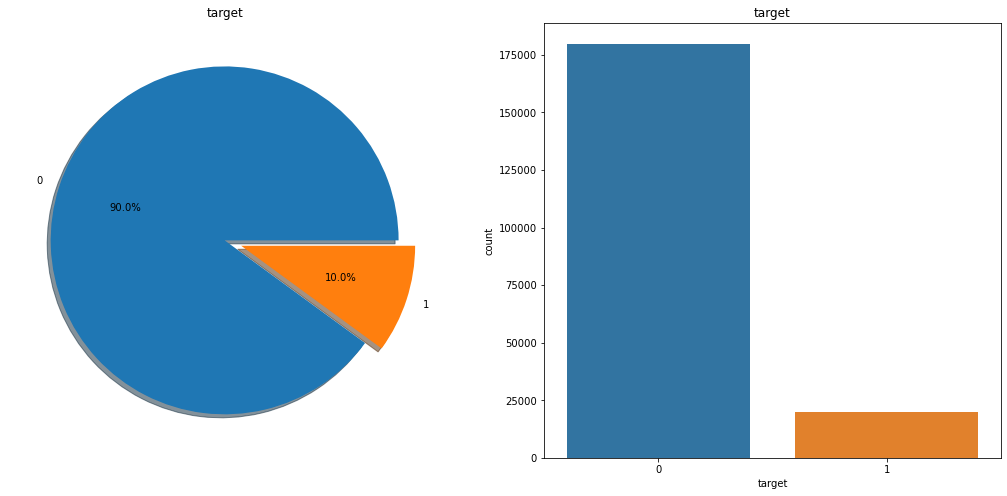

In [66]:
# Pie plot and Count plot for target class
f,ax=plt.subplots(1,2,figsize=(18,8))
df_train['target'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('target')
ax[0].set_ylabel('')
sns.countplot('target',data=df_train,ax=ax[1])
ax[1].set_title('target')
plt.show()

From the above two cells, we can clearly see that this is an unbalanced dataset and we have to resample it in the later stage

Distributions columns


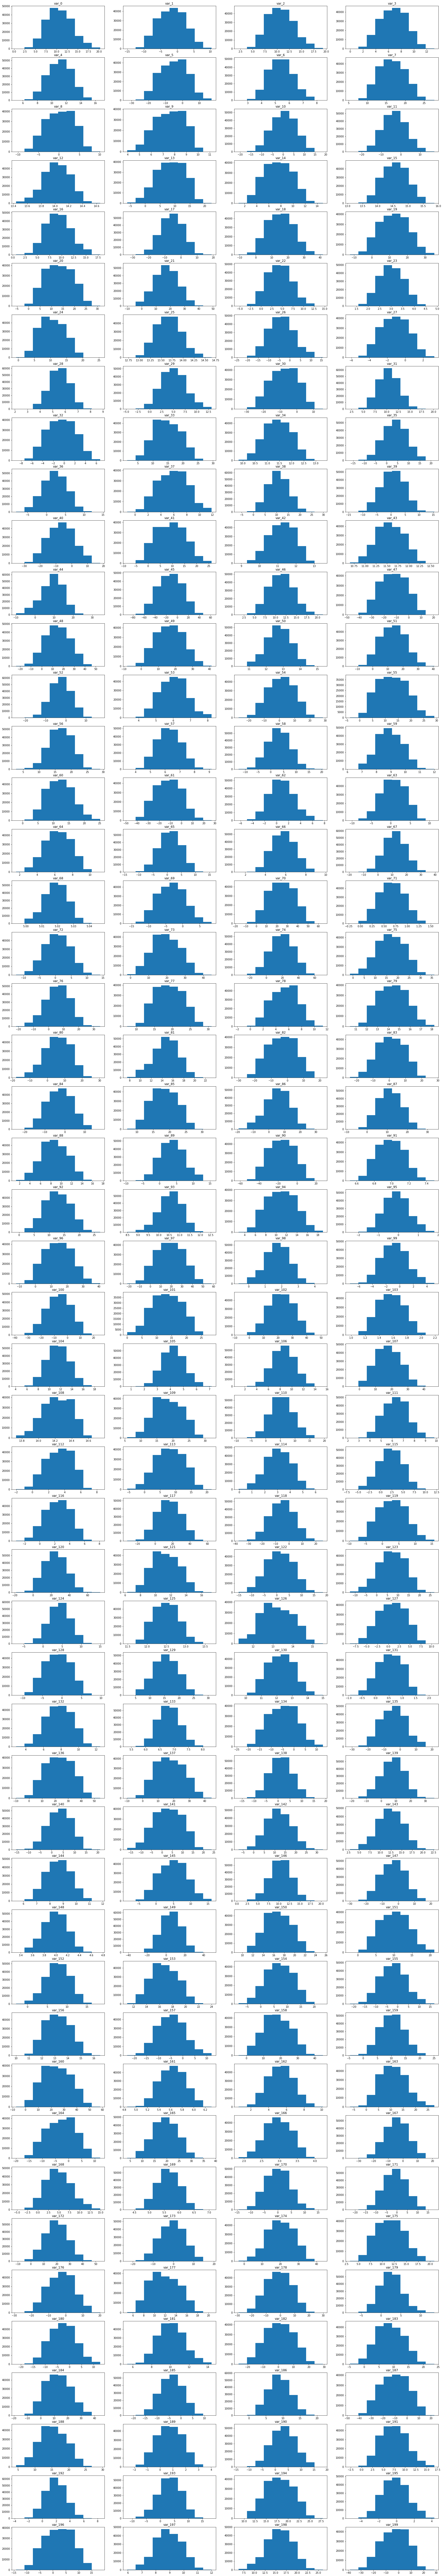

In [69]:
# Check distribution for all features using histogram

numerical_features = df_train.columns[2:]

print('Distributions columns')
plt.figure(figsize=(30, 185))
for i, col in enumerate(numerical_features):
    plt.subplot(50, 4, i + 1)
    plt.hist(df_train[col]) 
    plt.title(col)
gc.collect();

We can observe that all the features are almost similar, with a normal distribution. Let's check the distribution with each class

Distributions columns


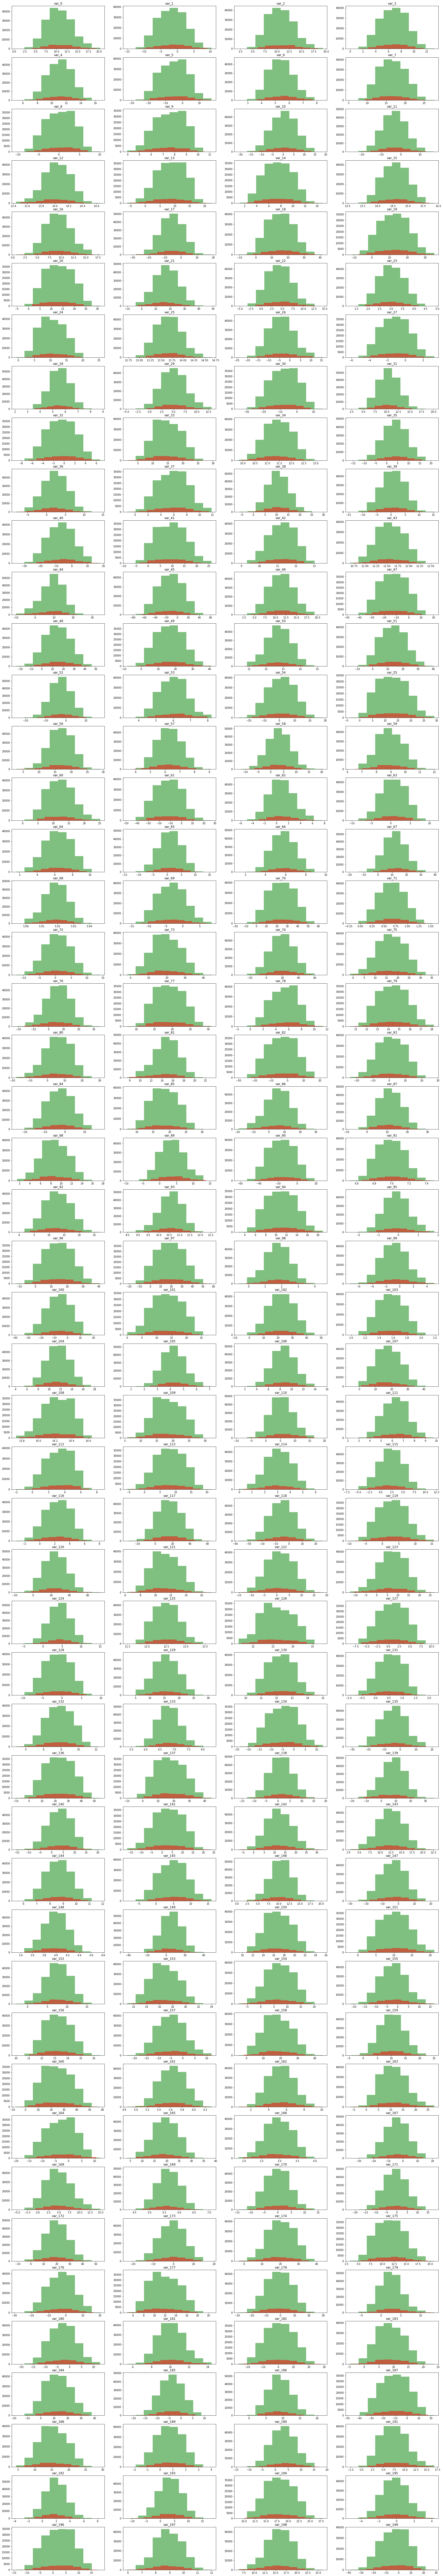

In [71]:
print('Distributions columns')
plt.figure(figsize=(30, 185))
for i, col in enumerate(numerical_features):
    plt.subplot(50, 4, i + 1)
    plt.hist(df_train[df_train["target"] == 0][col], alpha=0.5, label='0', color='g')
    plt.hist(df_train[df_train["target"] == 1][col], alpha=0.5, label='1', color='r')    
    plt.title(col)
gc.collect();


### Density Graphs

In [92]:
# Function to plot distribution of all features
def plot_feature_distribution(df1, df2, label1, label2, features):
    i = 0
    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(10,10,figsize=(18,22))

    for feature in features:
        i += 1
        plt.subplot(10,10,i)
        sns.distplot(df1[feature], hist=False,label=label1, color='red')
        sns.distplot(df2[feature], hist=False,label=label2, color='green')
        plt.xlabel(feature, fontsize=9)
        locs, labels = plt.xticks()
        plt.tick_params(axis='x', which='major', labelsize=6, pad=-6)
        plt.tick_params(axis='y', which='major', labelsize=6)
    plt.show()

Distributing train dataset

<Figure size 432x288 with 0 Axes>

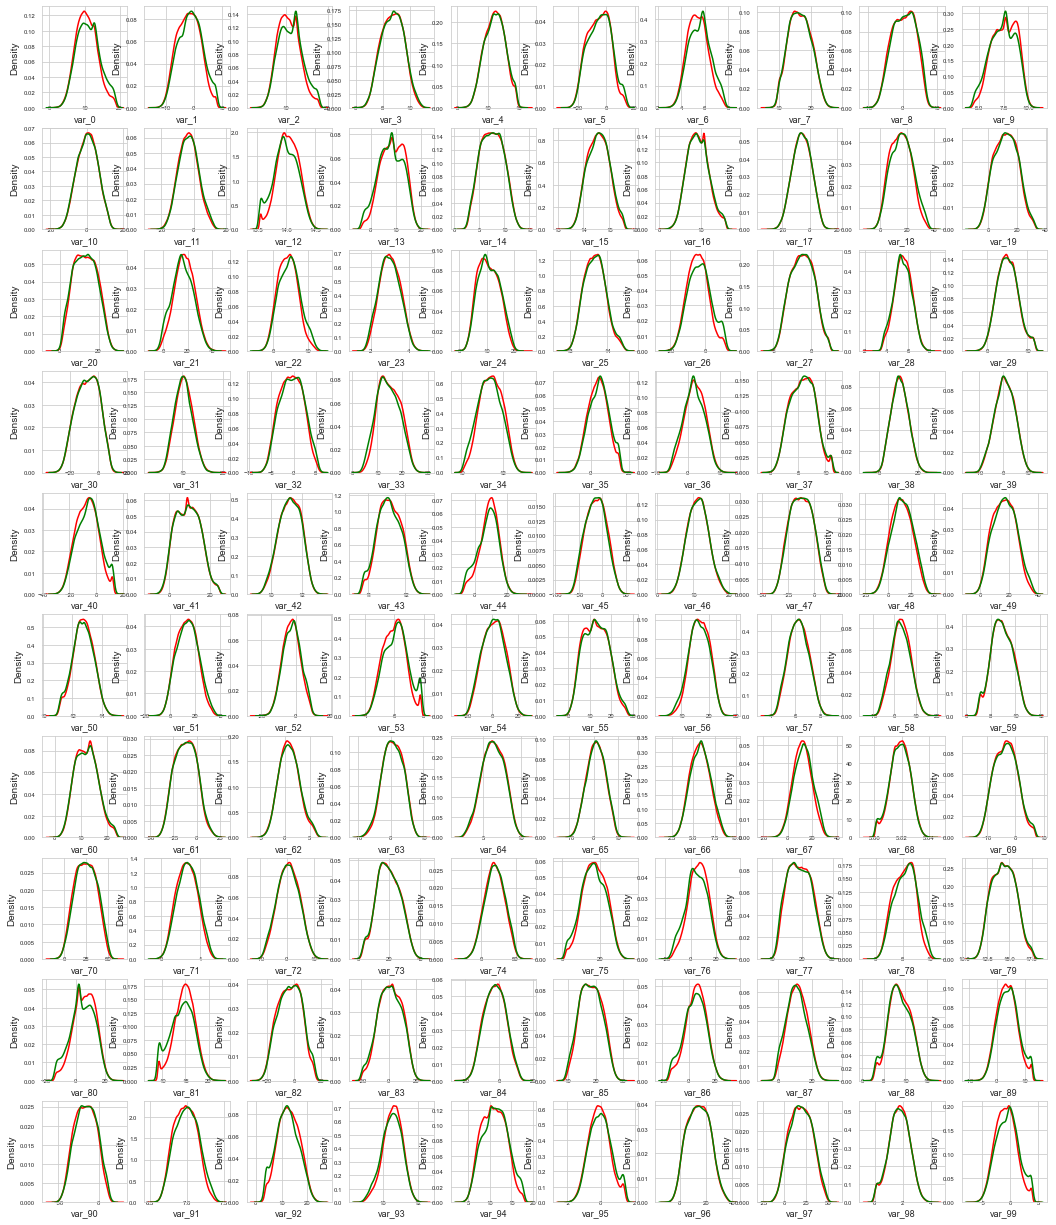

In [93]:
# Distribution for first 100 features
t0 = df_train.loc[df_train['target'] == 0]
t1 = df_train.loc[df_train['target'] == 1]
features = df_train.columns.values[2:102]
plot_feature_distribution(t0, t1, '0', '1', features)

The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.


<Figure size 432x288 with 0 Axes>

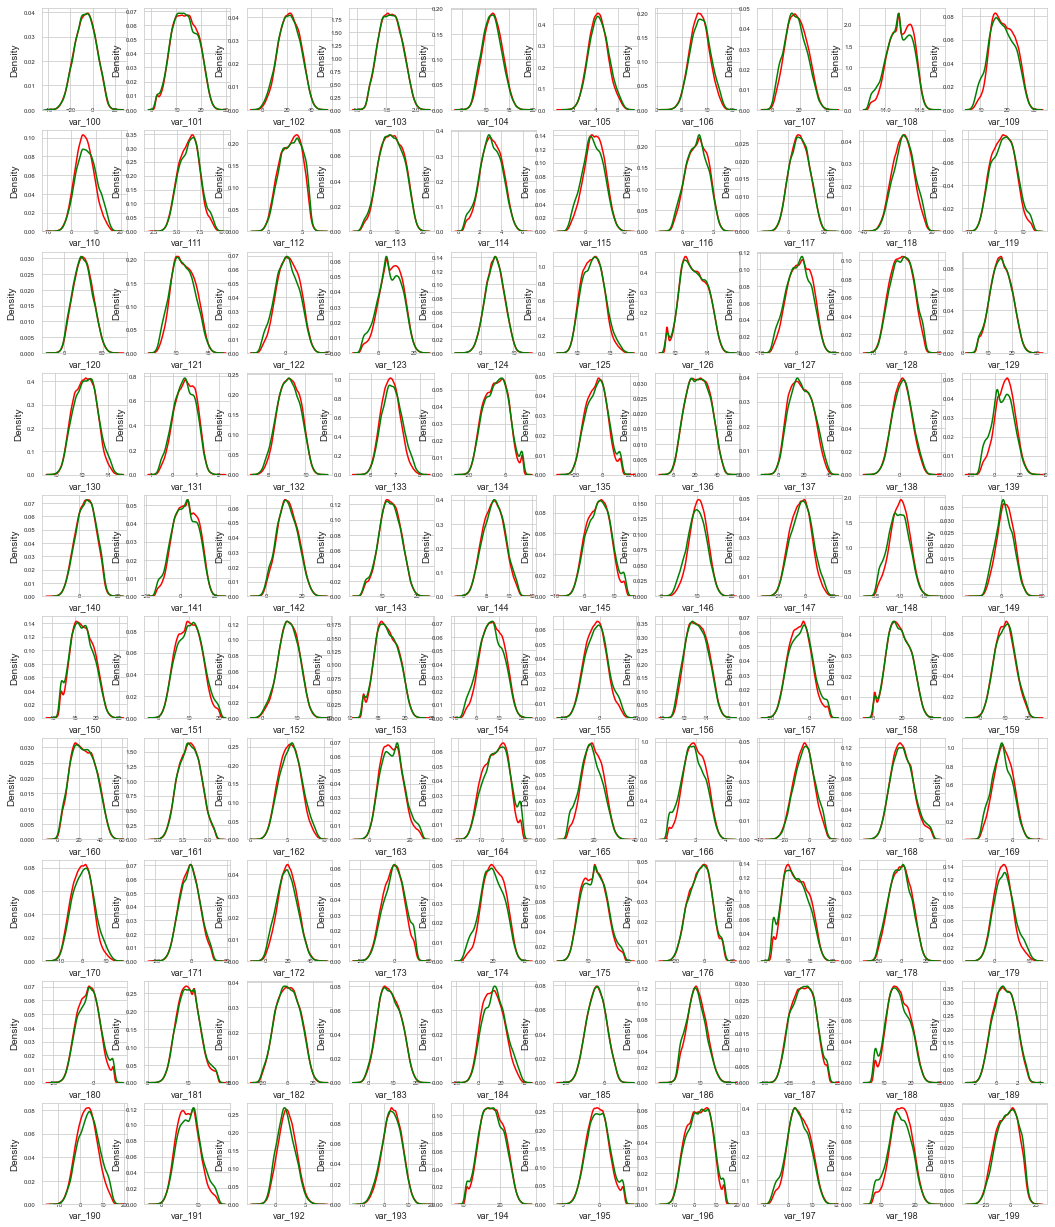

In [94]:
# Distribution for first 100 features
t0 = df_train.loc[df_train['target'] == 0]
t1 = df_train.loc[df_train['target'] == 1]
features = df_train.columns.values[102:]
plot_feature_distribution(t0, t1, '0', '1', features)

In [137]:
def plot_test_attribute_distribution(test_attributes):
    i=0
    sns.set_style('darkgrid')
    
    fig=plt.figure()
    ax=plt.subplots(10,10,figsize=(22,18))
    
    for attribute in test_attributes:
        i+=1
        plt.subplot(10,10,i)
        sns.distplot(df_test[attribute],hist=False)
        plt.xlabel('Attribute',)
        sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
    plt.show()

<Figure size 1440x2016 with 0 Axes>

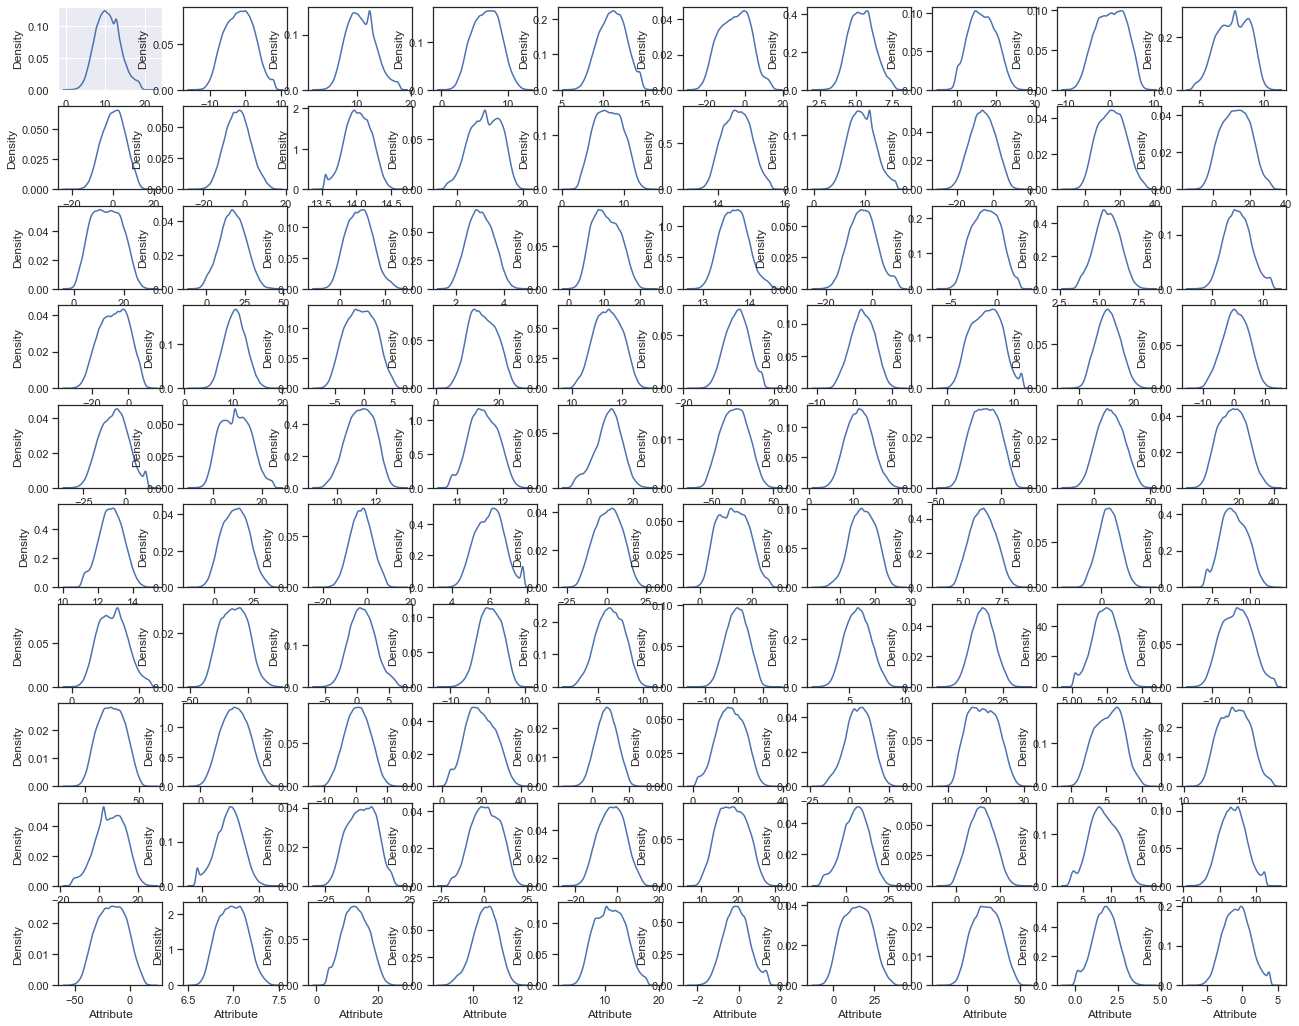

In [138]:
# Distribution for first 100 features
#test attribiutes from 1 to 101 -
test_attributes=df_test.columns.values[1:101]

#Plot distribution of test attributes -
plot_test_attribute_distribution(test_attributes)

<Figure size 1440x2016 with 0 Axes>

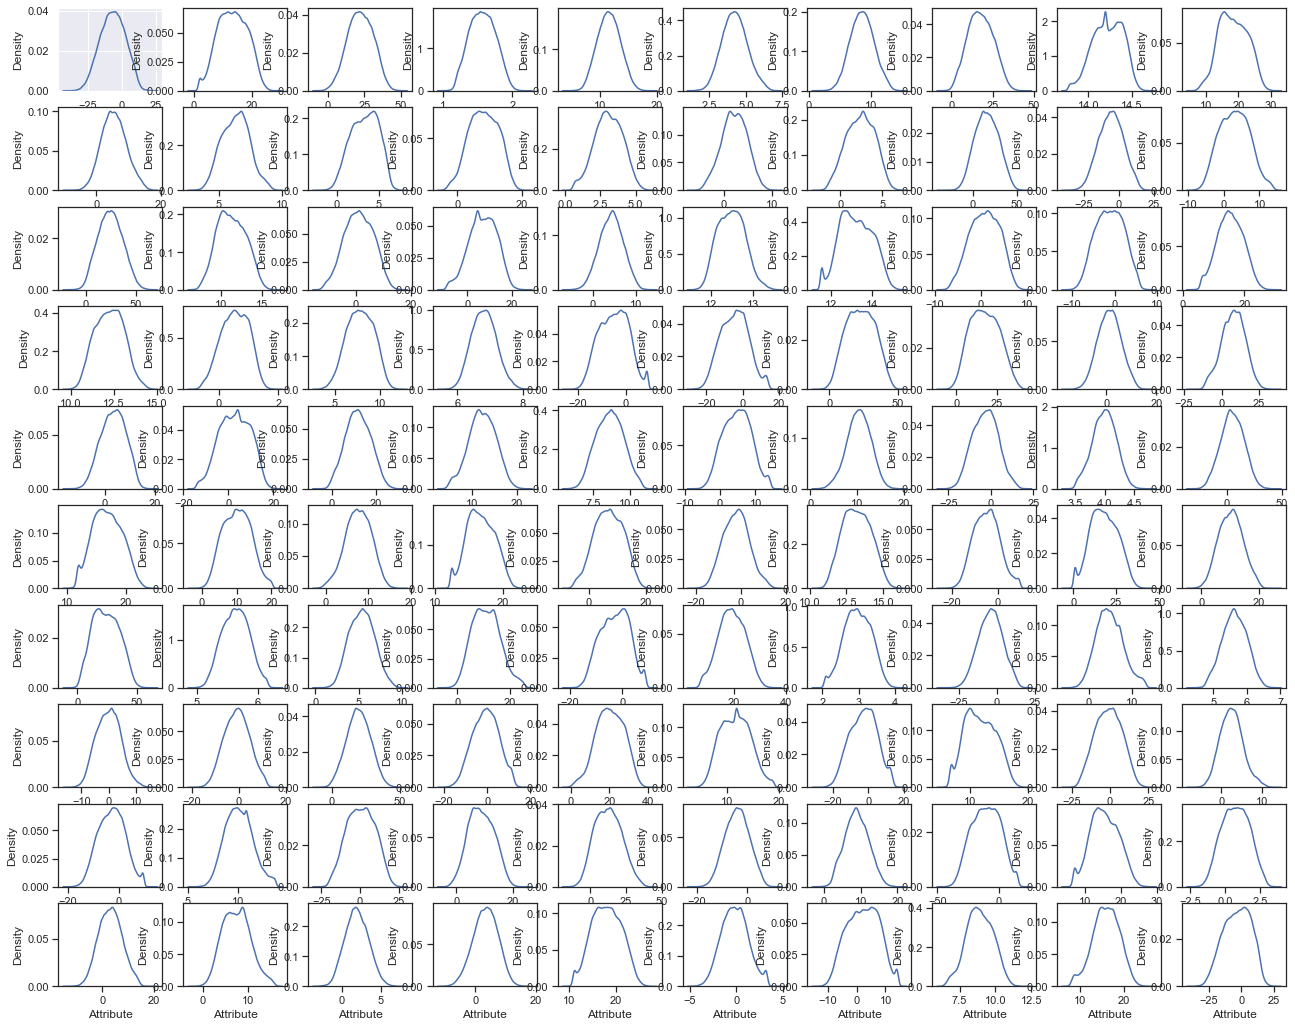

In [139]:
# Distribution for first 100 features
#test attributes from 101 to 202-
test_attributes=df_test.columns.values[101:202]

#Plot the distribution of test attributes-
plot_test_attribute_distribution(test_attributes)

We can observe that a significant number of features, such as var_0, var_9, etc have different distributions for two target variables and that have same distributions such as var_3, var_185, etc.

For each feature, we can see a very short difference between the density of the features when the target is 0 or 1. Looking at the training and test data, they have a very close density. As the data is anonymous and we don't know much about each feature, we can conclude that this dataset had a good pre-processing of the data, but not necessarily that they have been normalized.

### Distribution of statistical analysis

Training dataset

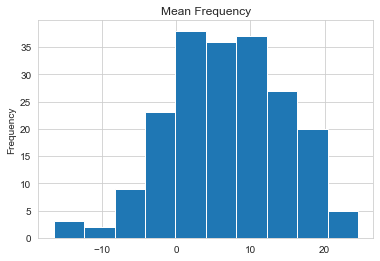

In [106]:
df_train[df_train.columns[2:]].mean().plot(kind ='hist');
plt.title('Mean Frequency');


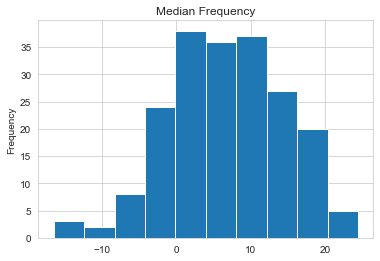

In [109]:
df_train[df_train.columns[2:]].median().plot(kind ='hist');
plt.title('Median Frequency');

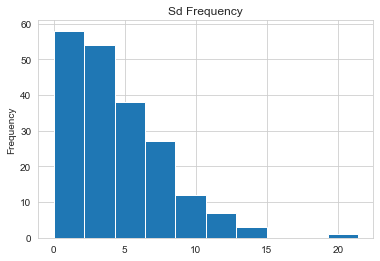

In [111]:
df_train[df_train.columns[2:]].std().plot(kind ='hist');
plt.title('Standard Deviation Frequency');

Testing dataset

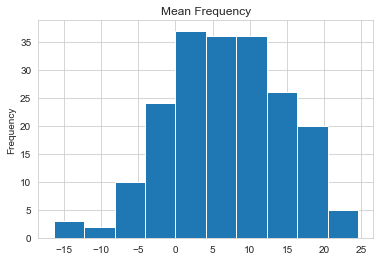

In [112]:
df_test[df_test.columns[2:]].mean().plot(kind ='hist');
plt.title('Mean Frequency');

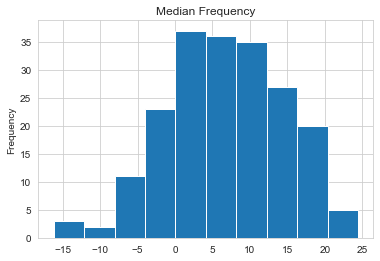

In [113]:
df_test[df_test.columns[2:]].median().plot(kind ='hist');
plt.title('Median Frequency');

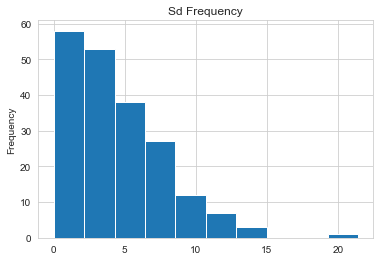

In [114]:
df_test[df_test.columns[2:]].std().plot(kind ='hist');
plt.title('Sd Frequency');

We can observe the following points:
- Standard deviation is large for both the training and test datasets
- Mean and median values have a similar distribution

In [98]:
# train_unique = df_train.nunique()
# test_unique = df_test.nunique()
# train_unique_0 = df_train[df_train['target']==0].nunique()
# train_unique_1 = df_train[df_train['target']==1].nunique()

In [115]:
# plt.figure(figsize=(10,8))
# plt.title("Unique Value Number for Each Group")
# plt.xlabel("Variables")
# plt.ylabel("Unique Value Counts")
# plt.plot(train_unique.values, label = 'train')
# plt.plot(train_unique_0.values, label = 'train_0')
# plt.plot(train_unique_1.values, label = 'train_1')
# plt.plot(test_unique.values[1:],label = 'test')
# plt.legend()

We can observe a substantial difference in the unique values of each feature of training and test dataset. From this we can infer that some noise has been added to the original data, creating synthetic data.

In [116]:
# Plot the distribution of different groups of data, test_data are full original data
# for j in range(13):
#     plt.figure(figsize=(15,18))
#     for i in range(16):
#         if i+j*16>199: continue
#         plt.subplot(4, 4, i+1)
#         train_0 = list(set(df_train['var_'+str(i+j*16)]))
#         test_0 = list(set(df_test['var_'+str(i+j*16)]))
#         var_0_diff = list(set(df_train['var_'+str(i+j*16)])-set(df_test['var_'+str(i+j*16)]))
#         var_0_inter = list(set(df_train['var_'+str(i+j*16)]).intersection(set(df_test['var_'+str(i+j*16)])))
#         sns.distplot(test_0, label = 'test', color='purple')
#         sns.distplot(var_0_diff, label = 'diff', color='yellow')
#         sns.distplot(var_0_inter, label = 'inter', color='green')
#         sns.distplot(train_0, label = 'train', color='blue')
#         plt.legend()
#         plt.title('var_'+str(i+j*16))
#         plt.xlabel('')
#     plt.show()

### Correlation between numerical data

<AxesSubplot:>

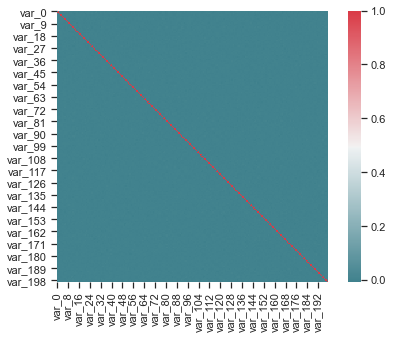

In [172]:
cols = df_train.columns[2:]
df_corr= df_train.loc[:, cols]
f,ax= plt.subplots(figsize=(7,5))
corr= df_corr.corr()
sns.heatmap(corr,mask= np.zeros_like(corr,dtype= np.bool),cmap= sns.diverging_palette(210,10,as_cmap= True),square= True,ax=ax)

<AxesSubplot:>

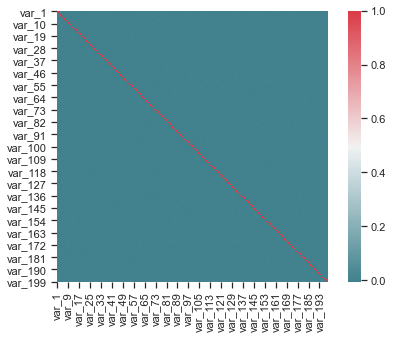

In [173]:
cols = df_test.columns[2:]
df_corr= df_test.loc[:, cols]
f,ax= plt.subplots(figsize=(7,5))
corr= df_corr.corr()
sns.heatmap(corr,mask= np.zeros_like(corr,dtype= np.bool),cmap= sns.diverging_palette(210,10,as_cmap= True),square= True,ax=ax)

From the above figures we can see that most of the correlations between the numerical data are close to zero. Thus, most of the numerical data are almost uncorrelated between them

In [127]:
#Correlation in train attiributes-
# train_attributes=df_train.columns.values[2:202]
# train_correlation=df_train[train_attributes].corr().abs().unstack().sort_values(kind='quicksort').reset_index()
# train_correlation=train_correlation[train_correlation['level_0']!=train_correlation['level_1']]
# print(train_correlation.head(10))
# print(train_correlation.tail(10))

In [128]:
# test_attributes=df_test.columns.values[1:201]
# test_correlation=df_test[train_attributes].corr().abs().unstack().sort_values(kind='quicksort').reset_index()
# test_correlation=test_correlation[test_correlation['level_0']!=test_correlation['level_1']]
# print(test_correlation.head(10))
# print(test_correlation.tail(10))

# Data Preprocessing

### Stratified KFold

As the dataset is unbalanced, it would be efficient to use stratified splits.

In [149]:
# Assign the target column to y and the rest of the features to X
cols=["target","ID_code"]
X = df_train.drop(cols,axis=1)
y = df_train["target"]

In [150]:
X_test  = df_test.drop("ID_code",axis=1)

In [159]:
# Perform StratifiedKfod the data
random_state = 42

# Split to 20% test data
X_other, X_test, y_other, y_test = train_test_split(X,y,test_size = 0.2,random_state=random_state)
print('test balance:',y_test.value_counts(normalize=True))

# do KFold split on other
kf = KFold(n_splits=5,shuffle=True,random_state=random_state)
for train_index, val_index in kf.split(X_other,y_other):
    X_train = X_other.iloc[train_index]
    y_train = y_other.iloc[train_index]
    X_val = X_other.iloc[val_index]
    y_val = y_other.iloc[val_index]
    print('train balance:')
    print(y_train.value_counts(normalize=True))
    print('val balance:')
    print(y_val.value_counts(normalize=True))

print("----------------------------------")
print(X.shape)

print('Other set:',X_other.shape, y_other.shape) 
print('Test set',X_test.shape, y_test.shape)
print('Validation set:',X_val.shape, y_val.shape) 
print('Train set:',X_train.shape, y_train.shape) 


test balance: 0    0.897575
1    0.102425
Name: target, dtype: float64
train balance:
0    0.899961
1    0.100039
Name: target, dtype: float64
val balance:
0    0.900125
1    0.099875
Name: target, dtype: float64
train balance:
0    0.900289
1    0.099711
Name: target, dtype: float64
val balance:
0    0.898813
1    0.101187
Name: target, dtype: float64
train balance:
0    0.900094
1    0.099906
Name: target, dtype: float64
val balance:
0    0.899594
1    0.100406
Name: target, dtype: float64
train balance:
0    0.899891
1    0.100109
Name: target, dtype: float64
val balance:
0    0.900406
1    0.099594
Name: target, dtype: float64
train balance:
0    0.899734
1    0.100266
Name: target, dtype: float64
val balance:
0    0.901031
1    0.098969
Name: target, dtype: float64
----------------------------------
(200000, 200)
Other set: (160000, 200) (160000,)
Test set (40000, 200) (40000,)
Validation set: (32000, 200) (32000,)
Train set: (128000, 200) (128000,)


### Standardise 

In [171]:
col=["target","ID_code"]
std_ftrs = df_train.drop(col,axis=1).columns
 
# collect all the encoders
preprocessor = ColumnTransformer(
    transformers=[
                 
        ('std', StandardScaler(), std_ftrs)])


clf = Pipeline(steps=[('preprocessor', preprocessor)]) # for now we only preprocess 
                                                       # later on we will add other steps here

X_train_prep = clf.fit_transform(X_train)
X_val_prep = clf.transform(X_val)
X_test_prep = clf.transform(X_test)

print(X_train.shape)
print(X_train_prep.shape)
print(X_train_prep)

(128000, 200)
(128000, 200)
[[ 0.53177696 -1.66905809 -0.57854516 ... -0.80100758 -0.98347046
   0.13471576]
 [ 1.55188619  1.08732979 -0.54033193 ... -0.47701544  2.05272145
   0.46141622]
 [-0.3430908  -0.74043425 -1.42606672 ...  0.45524863 -0.98566271
  -0.58465822]
 ...
 [ 2.00197692  0.64951614 -0.18510451 ... -1.02712936 -0.81470087
  -0.70579585]
 [-0.23302552  2.238549    0.82832393 ... -0.91905964  1.82469483
   0.06228829]
 [ 0.30194829 -0.44088533 -0.64977279 ...  1.79158059 -1.15755459
   0.33251987]]
